<a href="https://colab.research.google.com/github/dinesh-saka/CAPM-portfolio-management/blob/main/CAPM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [137]:
import pandas as pd
import seaborn as sns
import plotly.express as px
from copy import copy
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import plotly.figure_factory as ff
import plotly.graph_objects as go

In [138]:
# Read the stock data file
stocks_df = pd.read_csv("stock.csv")
stocks_df.head()

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,60.198570,75.510002,30.120001,12.13,175.929993,180.550003,28.250000,313.644379,1295.500000
1,2012-01-13,59.972858,74.599998,30.070000,12.35,178.419998,179.160004,22.790001,311.328064,1289.089966
2,2012-01-17,60.671429,75.239998,30.250000,12.25,181.660004,180.000000,26.600000,313.116364,1293.670044
3,2012-01-18,61.301430,75.059998,30.330000,12.73,189.440002,181.070007,26.809999,315.273285,1308.040039
4,2012-01-19,61.107143,75.559998,30.420000,12.80,194.449997,180.520004,26.760000,318.590851,1314.500000


In [139]:
# Sort the data based on Date
stocks_df = stocks_df.sort_values(by = ['Date'])
stocks_df.head()

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,60.198570,75.510002,30.120001,12.13,175.929993,180.550003,28.250000,313.644379,1295.500000
1,2012-01-13,59.972858,74.599998,30.070000,12.35,178.419998,179.160004,22.790001,311.328064,1289.089966
2,2012-01-17,60.671429,75.239998,30.250000,12.25,181.660004,180.000000,26.600000,313.116364,1293.670044
3,2012-01-18,61.301430,75.059998,30.330000,12.73,189.440002,181.070007,26.809999,315.273285,1308.040039
4,2012-01-19,61.107143,75.559998,30.420000,12.80,194.449997,180.520004,26.760000,318.590851,1314.500000


In [140]:
# Function to normalize the prices based on the initial price
def normalize(df):
  x = df.copy()
  for i in x.columns[1:]:
    x[i] = x[i]/x[i][0]
  return x

In [141]:
# Function to plot interactive plot
def interactive_plot(df, title):
  fig = px.line(title = title)
  for i in df.columns[1:]:
    fig.add_scatter(x = df['Date'], y = df[i], name = i)
  fig.show()

In [142]:
# Plot interactive chart
interactive_plot(stocks_df, 'Prices')

In [143]:
# Plot normalized interactive chart
interactive_plot(normalize(stocks_df), 'Normalized Prices')

In [144]:
# Function to calculate the daily returns
def daily_return(df):

  df_daily_return = df.copy()

  for i in df.columns[1:]:
    for j in range(1, len(df)):

      # Calculate the percentage of change from the previous day
      df_daily_return[i][j] = ((df[i][j]- df[i][j-1])/df[i][j-1]) * 100

    df_daily_return[i][0] = 0
  return df_daily_return

In [145]:
# Get the daily returns
stocks_daily_return = daily_return(stocks_df)
stocks_daily_return.head()

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2012-01-13,-0.374946,-1.205144,-0.166006,1.813685,1.415339,-0.769869,-19.327430,-0.738516,-0.494792
2,2012-01-17,1.164812,0.857909,0.598603,-0.809717,1.815943,0.468852,16.717854,0.574410,0.355295
3,2012-01-18,1.038382,-0.239234,0.264463,3.918367,4.282725,0.594448,0.789470,0.688856,1.110793
4,2012-01-19,-0.316937,0.666134,0.296736,0.549882,2.644634,-0.303752,-0.186494,1.052283,0.493866


In [146]:
stocks_daily_return.describe()

,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
count,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000
mean,0.107695,0.065907,0.008159,0.064662,0.151122,-0.006091,0.238398,0.084392,0.049316
std,1.775768,2.259817,1.264852,2.746590,1.927817,1.430991,3.430026,1.585558,1.048843
min,-12.864695,-23.848412,-9.241020,-33.613990,-10.997247,-12.850727,-19.327430,-11.100820,-11.984055
25%,-0.692402,-0.784088,-0.549592,-1.109729,-0.758938,-0.626272,-1.395229,-0.613768,-0.318606
50%,0.081097,0.077990,0.059506,0.108348,0.116286,0.021314,0.116436,0.060309,0.059362
75%,1.001854,0.946515,0.632362,1.276038,1.103391,0.659980,1.799542,0.860845,0.501914
max,11.980826,24.318606,10.022346,33.114754,15.745701,11.301051,24.395054,16.052431,9.382774


### Calculating Beta

In [147]:
stocks_daily_return['AAPL']

,AAPL
0,0.000000
1,-0.374946
2,1.164812
3,1.038382
4,-0.316937
...,...
2154,0.362467
2155,3.488923
2156,-2.449458
2157,1.453480


In [148]:
stocks_daily_return['sp500'].head()

,sp500
0,0.000000
1,-0.494792
2,0.355295
3,1.110793
4,0.493866


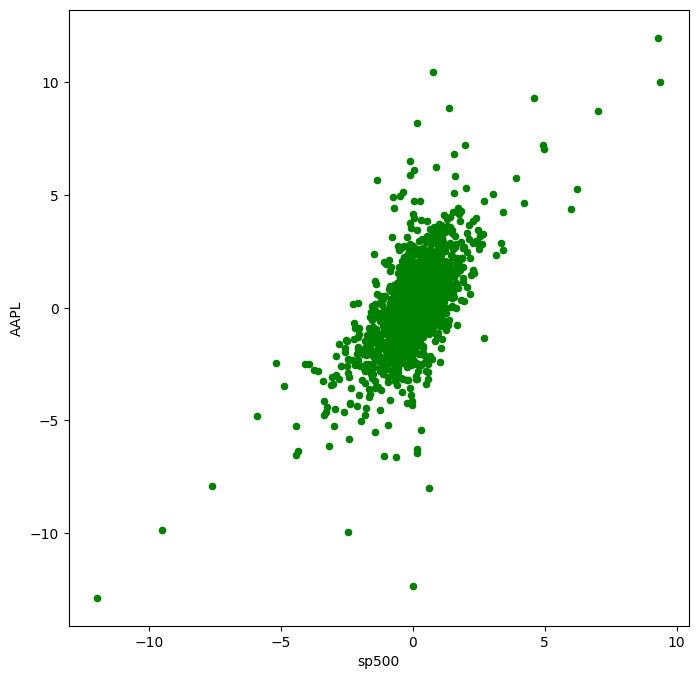

In [149]:
stocks_daily_return.plot(kind = 'scatter', x = 'sp500', y = 'AAPL',figsize=(8, 8),color='green')
plt.show()

In [150]:
beta, alpha = np.polyfit(stocks_daily_return['sp500'], stocks_daily_return['AAPL'], 1)
print('Beta for {} stock is = {}'.format('AAPL', round(beta,3), round(alpha,3)))

Beta for AAPL stock is = 1.113


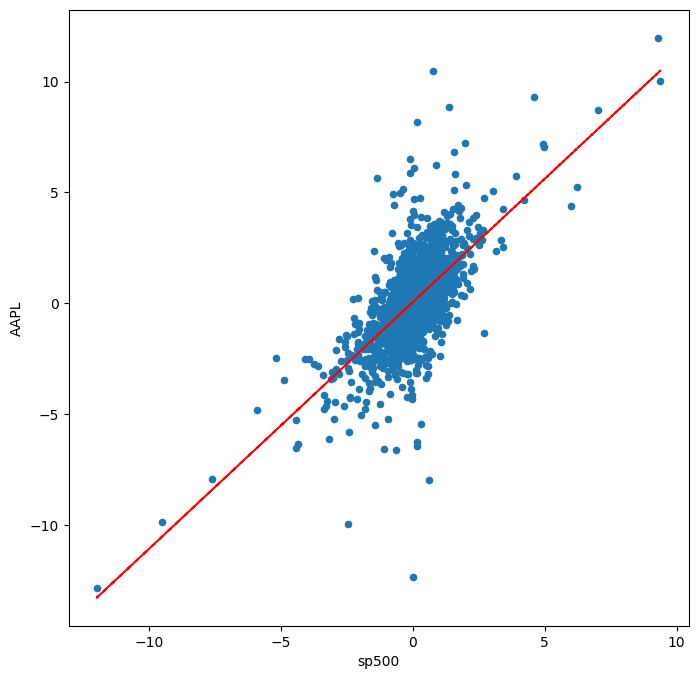

In [151]:
stocks_daily_return.plot(kind = 'scatter', x = 'sp500', y = 'AAPL',figsize=(8, 8))

# Straight line equation is y = beta * rm + alpha

plt.plot(stocks_daily_return['sp500'], beta * stocks_daily_return['sp500'] + alpha, '--', color = 'r')
plt.show()


In [152]:
beta, alpha = np.polyfit(stocks_daily_return['sp500'], stocks_daily_return['TSLA'], 1)
print('Beta for {} stock is = {}'.format('TSLA', round(beta,3), round(alpha,3)))

Beta for TSLA stock is = 1.269


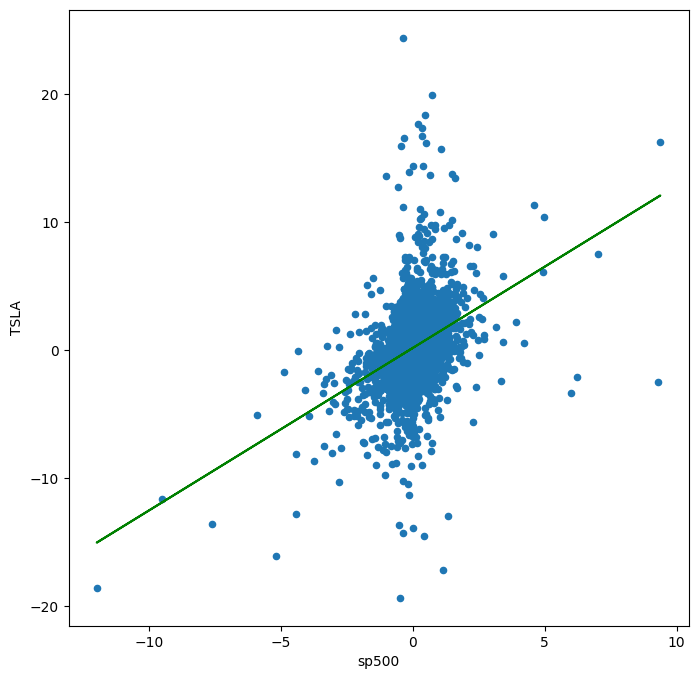

In [153]:
stocks_daily_return.plot(kind = 'scatter', x = 'sp500', y = 'TSLA',figsize=(8, 8))

# Straight line equation is y = beta * rm + alpha
plt.plot(stocks_daily_return['sp500'], beta * stocks_daily_return['sp500'] + alpha, '-', color = 'g')
plt.show()

In [154]:
beta

1.2686150101095903

In [155]:
# Let's calculate the average daily rate of return for S&P500
stocks_daily_return['sp500'].mean()

0.04931600660038911

In [156]:
# Let's calculate the annualized rate of return for S&P500
# Note that out of 365 days/year, stock exchanges are closed for 104 days during weekend days (Saturday and Sunday)
# Check your answers with: https://dqydj.com/sp-500-return-calculator/
rm = round(stocks_daily_return['sp500'].mean() * 252,3)
rm

12.428

In [157]:
# Assume risk free rate
rf = 0.66

# Calculate return for any security (APPL) using CAPM
ER_AAPL = round(rf + ( beta * (rm-rf) ), 3)
ER_AAPL

15.589

In [158]:
beta, alpha = np.polyfit(stocks_daily_return['sp500'], stocks_daily_return['T'], 1)
print('Beta for {} stock is = {}'.format('T', round(beta,3), round(alpha,3)))

Beta for T stock is = 0.745


In [159]:
# Calculate return for AT&T using CAPM
ER_T = round(rf + ( beta * (rm - rf) ), 3)
print(ER_T)

9.423


In [160]:
for i in stocks_daily_return.columns:
  if i != 'Date' and i != 'sp500':
    fig = px.scatter(stocks_daily_return, x = 'sp500', y = i, title = i)

    b, a = np.polyfit(stocks_daily_return['sp500'], stocks_daily_return[i], 1)

    fig.add_scatter(x = stocks_daily_return['sp500'], y = b*stocks_daily_return['sp500'] + a)
    fig.show()

###alpha
Alpha describes the strategy's ability to beat the market (S&P500)

Alpha indicates the excess return

A positive 0.175 alpha for Tesla means that the portfolio's return exceeded the benchmark S&P500 index by 17%.

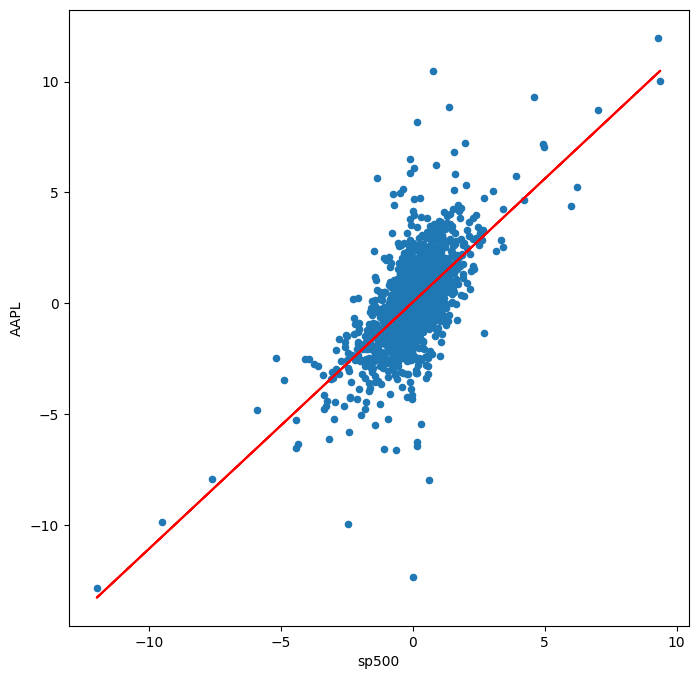

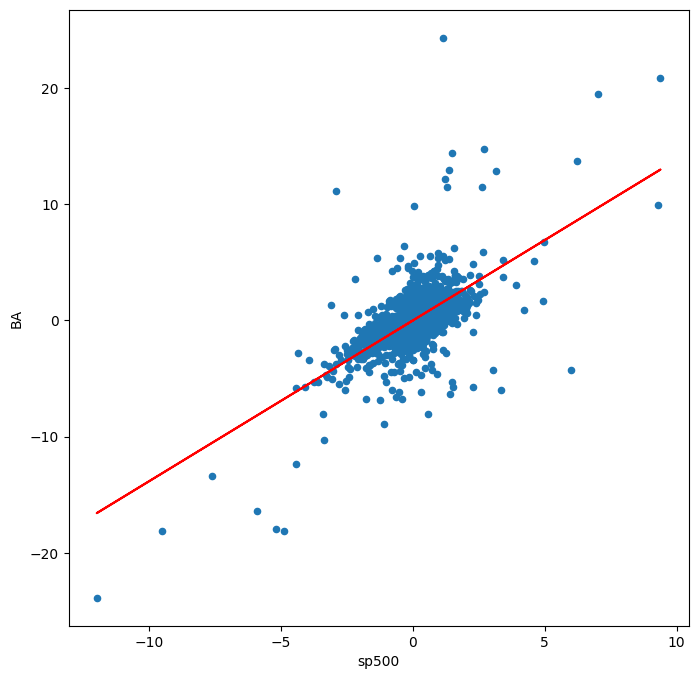

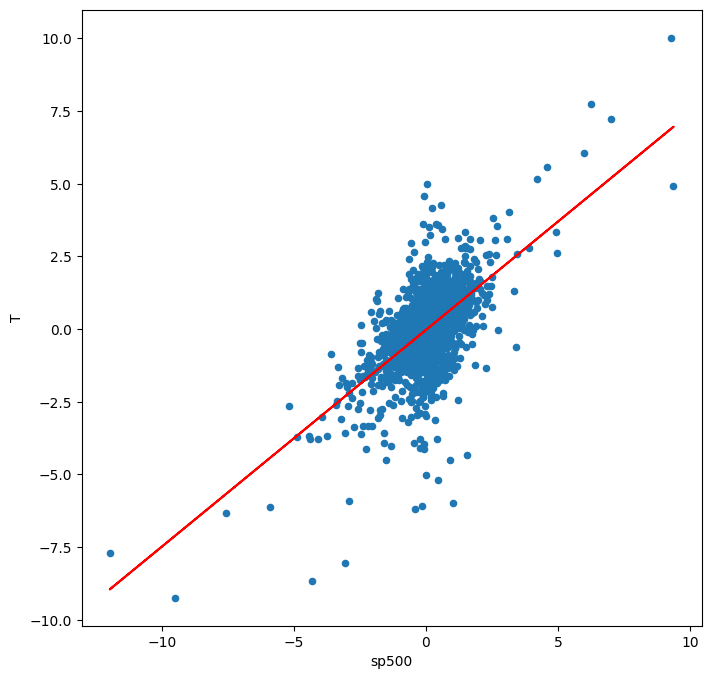

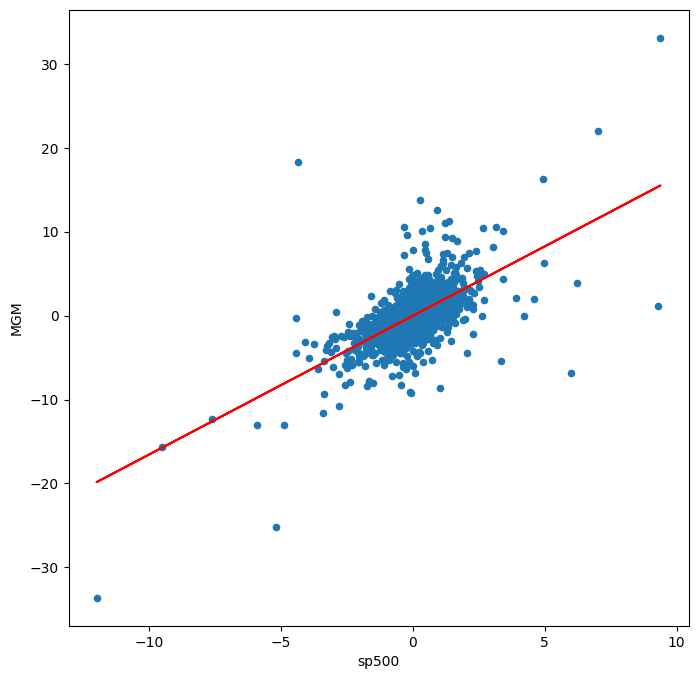

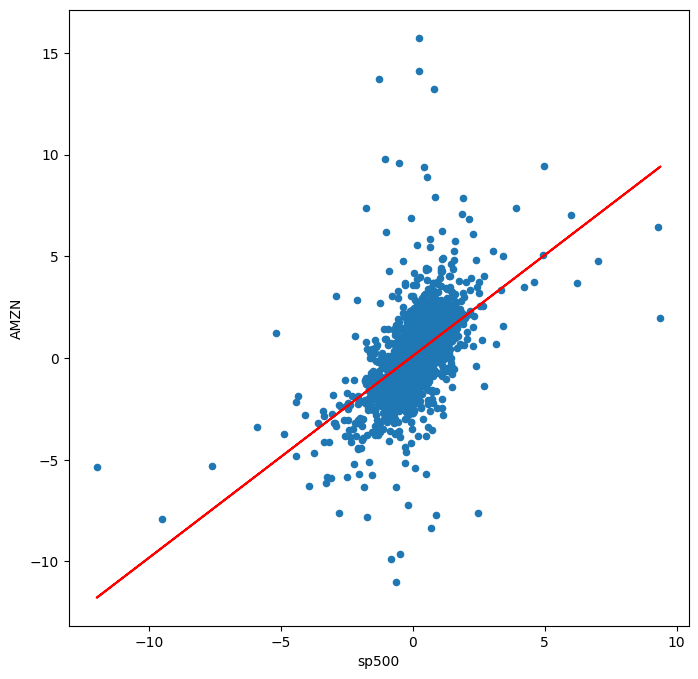

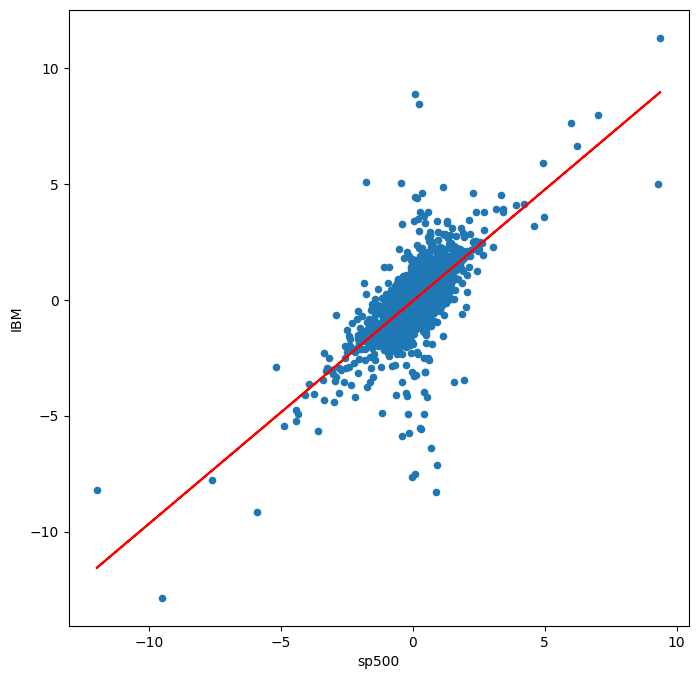

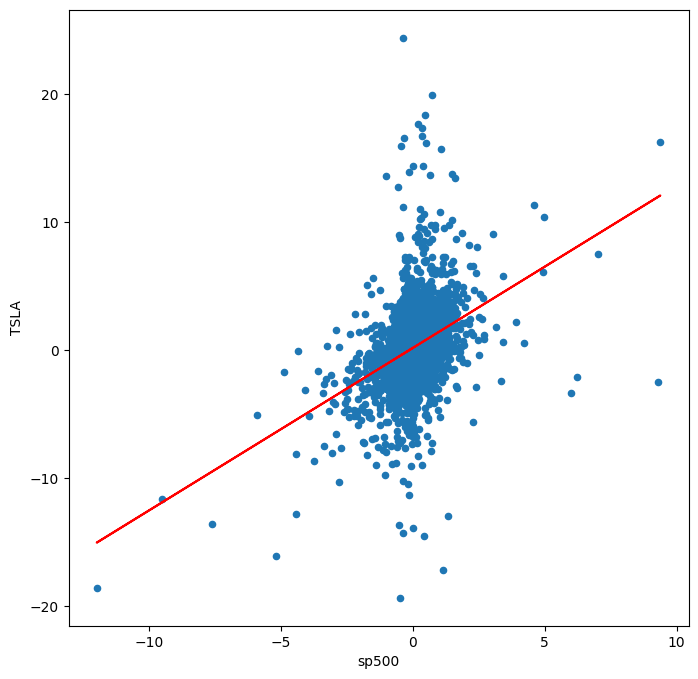

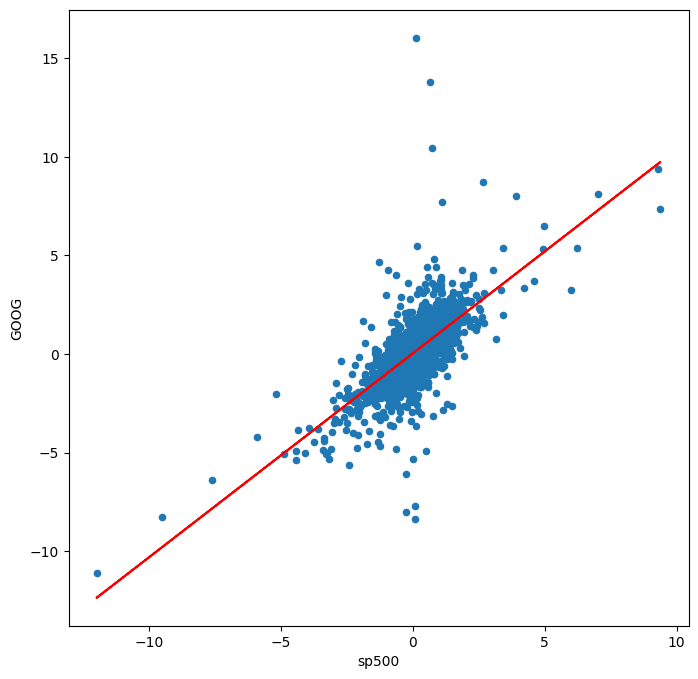

In [161]:
beta = {}
alpha = {}


for i in stocks_daily_return.columns:
  if i != 'Date' and i != 'sp500':
    stocks_daily_return.plot(kind = 'scatter', x = 'sp500', y = i,figsize=(8, 8))

    b, a = np.polyfit(stocks_daily_return['sp500'], stocks_daily_return[i], 1)

    plt.plot(stocks_daily_return['sp500'], b * stocks_daily_return['sp500'] + a, '-', color = 'r')

    beta[i] = b

    alpha[i] = a

    plt.show()

In [162]:
keys = list(beta.keys())
keys

['AAPL', 'BA', 'T', 'MGM', 'AMZN', 'IBM', 'TSLA', 'GOOG']

In [163]:
# expected return dictionary
ER = {}

rf = 0.66
rm = round(stocks_daily_return['sp500'].mean() * 252,3) # this is the expected return of the market
rm

12.428

From Business & Market :
- Technology company : AAPL
- Aerospace company : BA
- Telecommunications company : T
- Hospitality company :  MGM
- E-commerce company : AMZN
- Computer hardware company : IBM
- Electric car company : TSLA
- Multinational conglomerate company : GOOG

In [164]:
for i in keys:
  # Calculate return for every security using CAPM
  ER[i] = rf + ( beta[i] * (rm-rf) )

In [165]:
for i in keys:
  print('Expected Return Based on CAPM for {} is {}%'.format(i, round(ER[i],3)))

Expected Return Based on CAPM for AAPL is 13.757%
Expected Return Based on CAPM for BA is 16.934%
Expected Return Based on CAPM for T is 9.423%
Expected Return Based on CAPM for MGM is 20.119%
Expected Return Based on CAPM for AMZN is 12.331%
Expected Return Based on CAPM for IBM is 11.962%
Expected Return Based on CAPM for TSLA is 15.589%
Expected Return Based on CAPM for GOOG is 12.838%


In [166]:
# Assume equal weights in the portfolio
portfolio_weights = 1/8 * np.ones(8)
portfolio_weights

array([0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125])

In [167]:
ER_values = np.array(list(ER.values()))
portfolio_weights = np.array(portfolio_weights)

# Calculate the portfolio return
ER_portfolio_all = round(np.dot(ER_values, portfolio_weights), 3)
print('Expected Return Based on CAPM for the portfolio is {}%\n'.format(ER_portfolio_all))

Expected Return Based on CAPM for the portfolio is 14.119%



**Suggested to invest, Returns better than S&P 500**

In [168]:
# Calculate the portfolio return
ER_portfolio = round(0.50 * ER['AAPL'] +  0.50 * ER['AMZN'],3)
print('Expected Return Based on CAPM for the portfolio (50% allocation in Apple and 50% in Amazon) is {}%\n'
      .format(ER_portfolio))

Expected Return Based on CAPM for the portfolio (50% allocation in Apple and 50% in Amazon) is 13.044%



**Suggested to invest, Returns better than S&P 500**

In [169]:
# Calculate the portfolio return
ER_portfolio_ConsumerServices = round(0.50 * ER['T'] +  0.50 * ER['MGM'],3)
print('Expected Return Based on CAPM for the portfolio (Consumer Services) is {}%\n'
      .format(ER_portfolio_ConsumerServices))

Expected Return Based on CAPM for the portfolio (Consumer Services) is 14.771%



**Suggested to invest, Returns better than S&P 500**

In [170]:
# Calculate the portfolio return
ER_portfolio_Manufacturing = round(0.50 * ER['TSLA'] +  0.50 * ER['BA'],3)
print('Expected Return Based on CAPM for the portfolio (Manufacturing Sector) is {}%\n'
      .format(ER_portfolio_Manufacturing))

Expected Return Based on CAPM for the portfolio (Manufacturing Sector) is 16.261%



**Suggested to invest, Returns better than S&P 500**

In [171]:
# Calculate the portfolio return
ER_portfolio_PersonalDevices = round(0.25 * ER['AAPL'] +  0.25 * ER['IBM']+0.25 * ER['GOOG'] +  0.25 * ER['AMZN'],3)
print('Expected Return Based on CAPM for the portfolio (Personal Devices Sector) is {}%\n'
      .format(ER_portfolio_PersonalDevices))

Expected Return Based on CAPM for the portfolio (Personal Devices Sector) is 12.722%



**Suggested to invest, Returns better than S&P 500**

In [172]:
ER_portfolio_bm = round(0.25 * ER['T'] +  0.25 * ER['IBM']+0.25 * ER['GOOG'] +  0.25 * ER['AMZN'],3)
print('Expected Return Based on CAPM for the portfolio (Less than Market Return) is {}%\n'
      .format(ER_portfolio_bm))

Expected Return Based on CAPM for the portfolio (Less than Market Return) is 11.639%



**Suggested not to invest, Returns better than S&P 500**

In [173]:
ER_portfolio_am = round(0.25 * ER['AAPL'] +  0.25 * ER['BA']+ 0.25 * ER['MGM'] + 0.25 * ER['TSLA'] ,3)
print('Expected Return Based on CAPM for the portfolio (Above than  Market Return) is {}%\n'
      .format(ER_portfolio_am))

Expected Return Based on CAPM for the portfolio (Above than  Market Return) is 16.6%



**Suggested to invest, Returns better than S&P 500**

In [174]:
sum=0
for i in keys:
    sum=sum+ER[i]
for i in keys:
  print('Contribution on CAPM for {} is {}'.format(i, round(ER[i]/sum,2)))

Contribution on CAPM for AAPL is 0.12
Contribution on CAPM for BA is 0.15
Contribution on CAPM for T is 0.08
Contribution on CAPM for MGM is 0.18
Contribution on CAPM for AMZN is 0.11
Contribution on CAPM for IBM is 0.11
Contribution on CAPM for TSLA is 0.14
Contribution on CAPM for GOOG is 0.11


In [175]:
ER_portfolio_b = round(.12 * ER['AAPL'] +  .15 * ER['BA']+ 0.08 * ER['T'] + .18 * ER['MGM']+
                     0.11 * ER['AMZN'] +  .11 * ER['IBM']+ .14* ER['TSLA'] + .11* ER['GOOG'],3)
print('Expected Return Based on CAPM for the portfolio (Balanced Weightage) is {}%\n'
      .format(ER_portfolio_b))

Expected Return Based on CAPM for the portfolio (Balanced Weightage) is 14.833%



**Suggested to invest, Returns better than S&P 500**

In [176]:
ER_portfolio_hp = round(0.33 * ER['TSLA'] +  0.33 * ER['BA']+ 0.34 * ER['MGM'] ,3)
print('Expected Return Based on CAPM for the portfolio (High performing) is {}%\n'
      .format(ER_portfolio_hp))

Expected Return Based on CAPM for the portfolio (High performing) is 17.573%



**Suggested to invest, Returns better than S&P 500**

In [177]:
# Calculate the portfolio return
ER_portfolio_lp = round(0.33 * ER['T'] +  0.33 * ER['GOOG']+0.34 * ER['IBM'],3)
print('Expected Return Based on CAPM for the portfolio (Weak performing) is {}%\n'
      .format(ER_portfolio_lp))

Expected Return Based on CAPM for the portfolio (Weak performing) is 11.413%



**Suggested not to invest, Returns better than S&P 500**

In [178]:
ER_portfolio_ap = round(ER['AAPL'] ,3)
print('Expected Return Based on CAPM for the portfolio (Average performing) is {}%\n'
      .format(ER_portfolio_ap))

Expected Return Based on CAPM for the portfolio (Average performing) is 13.757%



**Suggested to invest, Returns better than S&P 500**

In [179]:
# Calculate the portfolio return
ER_portfolio_ed = round(0.50 * ER['T'] +  0.50 * ER['MGM'],3)
print('Expected Return Based on CAPM for the portfolio (Extremes) is {}%\n'
      .format(ER_portfolio_ed))

Expected Return Based on CAPM for the portfolio (Extremes) is 14.771%



**Suggested to invest, Returns better than S&P 500**

In [180]:
# Calculate the portfolio return
ER_portfolio_ed = round(0.50 * ER['GOOG'] +  0.50 * ER['AAPL'],3)
print('Expected Return Based on CAPM for the portfolio (Median) is {}%\n'
      .format(ER_portfolio_ed))

Expected Return Based on CAPM for the portfolio (Median) is 13.298%



**Suggested to invest, Returns better than S&P 500**

In [181]:
data = {'Combinations':['AAPL', 'BA', 'T', 'MGM','AMZN','IBM','TSLA','GOOG','Equal Portfolio Weights',
                        'AAPL+AMZN','Consumer Services','Manufacturing Sector','Personal Devices Sector',
                        'Less than Market Return','Above than  Market Return','Balanced Weightage',
                        'High performing','Weak performing','Average performing','Extremes','Median'],
        'Expected Return Based on CAPM':[13.757,16.934, 9.423, 20.119,12.331,11.962,15.589,12.838,14.119,
                                         13.044,14.771,16.261,12.722,11.639,16.6,14.833,17.573,11.413,
                                         13.757,14.771,13.298]}
Returns = pd.DataFrame(data)
Returns.sort_values(by='Expected Return Based on CAPM', ascending=False,inplace=True)
Returns

,Combinations,Expected Return Based on CAPM
3,MGM,20.119
16,High performing,17.573
1,BA,16.934
14,Above than Market Return,16.600
11,Manufacturing Sector,16.261
6,TSLA,15.589
15,Balanced Weightage,14.833
10,Consumer Services,14.771
19,Extremes,14.771
8,Equal Portfolio Weights,14.119


In [182]:
print("Top 5 Suggested Portfolio")
Returns[:5]

Top 5 Suggested Portfolio


,Combinations,Expected Return Based on CAPM
3,MGM,20.119
16,High performing,17.573
1,BA,16.934
14,Above than Market Return,16.600
11,Manufacturing Sector,16.261


In [183]:
print("Bottom 5 Suggested Portfolio")
Returns.tail()

Bottom 5 Suggested Portfolio


,Combinations,Expected Return Based on CAPM
4,AMZN,12.331
5,IBM,11.962
13,Less than Market Return,11.639
17,Weak performing,11.413
2,T,9.423
